In [1]:
#Importing Libraries
import pandas as pd
import datetime
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [2]:
#importing data
mort_data=pd.read_csv(Path('C:/Users/jrram/Desktop/historicalweeklydata (1).csv'),header=6, index_col="Week", parse_dates=True)

#cleaning up data
mort_data.drop(columns=["points", "points.1", "points.2", "spread", "Unnamed: 9"], inplace=True)
mort_data.tail()

,FRM,FRM.1,ARM,margin
Week,,,,
2020-12-03,2.71,2.26,2.86,2.75
2020-12-10,2.71,2.26,2.79,2.75
2020-12-17,2.67,2.21,2.79,2.75
2020-12-24,2.66,2.19,2.79,2.75
2020-12-31,2.67,2.17,2.71,2.75


In [3]:
mort_data.dropna(inplace=True)

In [4]:
#importing more mortgage data
new_mort_data=pd.read_csv(('C:/Users/jrram/Desktop/historicalweeklydata(2).csv'),skiprows=2, index_col="Week", parse_dates=True)

#cleaning up data
new_mort_data.drop(columns=["points", "points.1", "points.2", "spread", "Unnamed: 9"], inplace=True)
new_mort_data.tail()

,FRM,FRM.1,ARM,margin
Week,,,,
2021-07-01,2.98,2.26,2.54,2.75
2021-07-08,2.90,2.20,2.52,2.75
2021-07-15,2.88,2.22,2.47,2.75
2021-07-22,2.78,2.12,2.49,2.75
2021-07-29,2.80,2.10,2.45,2.75


In [5]:
#cleaning up date to facilitate merge or dataframes
mort_data = mort_data.append(new_mort_data, sort=True)
mort_data.tail()
weekly_mort_data=mort_data.resample('M').first()
for idx, each_row in weekly_mort_data.iterrows(): 
    weekly_mort_data.loc[idx, 'date']=datetime.date(idx.year, idx.month, 1)
weekly_mort_data=weekly_mort_data.set_index('date', drop=True)
weekly_mort_data

,ARM,FRM,FRM.1,margin
date,,,,
2005-01-01,5.03,5.77,5.21,2.78
2005-02-01,5.00,5.63,5.14,2.79
2005-03-01,5.17,5.79,5.33,2.79
2005-04-01,5.33,5.93,5.48,2.78
2005-05-01,5.16,5.75,5.31,2.79
...,...,...,...,...
2021-03-01,2.73,3.02,2.34,2.75
2021-04-01,2.84,3.18,2.45,2.75
2021-05-01,2.70,2.96,2.30,2.75


In [6]:
#importing house sold data
house_sold= pd.read_excel(Path('C:/Users/jrram/Desktop/sold_cust.xls'),skiprows=7,sheet_name=1)
house_sold=house_sold.iloc[:-3, :]

#cleaning up index and date
house_sold['date']=pd.to_datetime(house_sold['Unnamed: 0'])
house_sold=house_sold.set_index('date')
house_sold=house_sold.drop(columns=['Unnamed: 0'])


In [7]:
#renaming columns
house_sold=house_sold.rename(columns={"Unnamed: 0": "Year", "States" : "US", "east": "NE", 'West': 'NW', 'Unnamed: 4': 'South', 'Unnamed: 5':'West'})

#drop non-needed columns
house_sold.drop(columns=["States.1", "east.1", "West.1", "Unnamed: 10", "Unnamed: 9"], inplace=True)

In [14]:
#creating one dataframe
combined=weekly_mort_data.merge(house_sold,left_index=True, right_index=True)
combined.head(4)

,ARM,FRM,FRM.1,margin,US,NE,NW,South,West
date,,,,,,,,,
2005-01-01,5.03,5.77,5.21,2.78,92.0,4,12,50,25
2005-02-01,5.00,5.63,5.14,2.79,109.0,7,15,56,31
2005-03-01,5.17,5.79,5.33,2.79,127.0,7,21,62,37
2005-04-01,5.33,5.93,5.48,2.78,116.0,9,20,54,33


In [9]:
#creating X and y factors
X =combined[['ARM','FRM','FRM.1','margin']]
y=combined['US']



In [10]:
#creating X_train,test, and y_train,test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
list(zip(rf.feature_importances_, X_train.columns))

#the more the banks has to make, the harder FAs push to sell
#the margin is most related to #houses sold
#48% of houses sold can be explained by margin
#ARM is the worst at explaining #houses sold

[(0.10785978951600725, 'ARM'),
 (0.2368076247883444, 'FRM'),
 (0.16709887532591067, 'FRM.1'),
 (0.48823371036973756, 'margin')]

,margin,US
margin,1.00000,0.71647
US,0.71647,1.00000


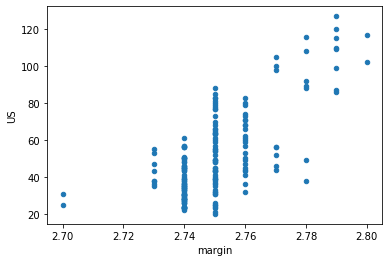

In [12]:
import matplotlib.pyplot as plt
combined[['margin', 'US']].plot(kind='scatter', x='margin', y='US')
combined[['margin', 'US']].corr()

In [13]:
#the more the banks has to make, the harder FAs push to sell
#the margin is most related to #houses sold
#48% of houses sold is related can be explained by
#ARM is the worst at explaining #houses sold